# data loading

In [ ]:
import pandas as pd

# Load datasets
df = pd.read_csv('/content/DATASET3 (1).csv')

# Display the first few rows of each dataset
print("Dataset :")
print(df.head(20))

Dataset :
                                            statement  label
0   Tanzanian club spokesman Haji S Manara was inf...      0
1               dr fauci sat microsoft board director      0
2   NEWS UK safe from coronavirus as Boris Johnson...      0
3   Does vaping reduce your chances of getting the...      0
4   WHO eu_echo Canada  DFID_UK joined forces to s...      1
5   d_s_thakur CDSCO_INDIA_INF spkalantri Sir i wa...      0
6   Anyone interested in rise of fascism globally ...      0
7   1980s Rock Group The Knack Make Come Back with...      0
8                     Situation is  CoronaInPakistan       0
9   Public Health Professionals Need COVID19 resou...      1
10  Our daily update is published Weve now tracked...      1
11  A 28yearold doctor from Maharashtra Dr Maneesh...      0
12  A study of 265 patients at the Central Hospita...      1
13  VTE risk is  50 lower in patients with RA taki...      1
14  New daily deaths held steady at 1182 about as ...      1
15  A Target s

check for duplicates

In [ ]:
df.nunique()

,0
statement,11956
label,2


In [ ]:
# Show non-unique rows (rows that have duplicates)
non_unique_rows = df[df.duplicated(keep=False)]
print("Non-unique rows:")
print(non_unique_rows)


Non-unique rows:
                                               statement  label
9      Public Health Professionals Need COVID19 resou...      1
52     Quinine found in tonic water along with 50100m...      0
66     COVID19 mortality rate in Black Americans is 4...      1
81     A study from the CDC and the WHO proves face m...      0
93     Australia appears to be heading for its lowest...      1
...                                                  ...    ...
12124  Says video shows the Chinese are destroying th...      0
12132  Coronavirus Inevitable second wave would happe...      1
12138  NEWS Government finalising strategy to blame y...      0
12208  NEWS Coronavirus crisis in Italy leads Donald ...      0
12210  For a breakdown of cases by states in real tim...      1

[569 rows x 2 columns]


In [ ]:
# Remove non-unique rows
df = df.drop_duplicates(keep='first')

# Show the DataFrame after removing non-unique rows
print("\nDataFrame after removing non-unique rows:")
print(df)


DataFrame after removing non-unique rows:
                                               statement  label
0      Tanzanian club spokesman Haji S Manara was inf...      0
1                  dr fauci sat microsoft board director      0
2      NEWS UK safe from coronavirus as Boris Johnson...      0
3      Does vaping reduce your chances of getting the...      0
4      WHO eu_echo Canada DFID_UK joined forces to su...      1
...                                                  ...    ...
12254  There are 54 people linked to the community cl...      1
12255  WHO director overstated COVID19 fatality rate ...      0
12256  Through the allocation framework COVAX will en...      1
12257  pope francis say covid vaccine required enter ...      0
12258  The owner of the Indian jewellry group Joyaluk...      0

[11957 rows x 2 columns]


TypeError: 'module' object is not callable

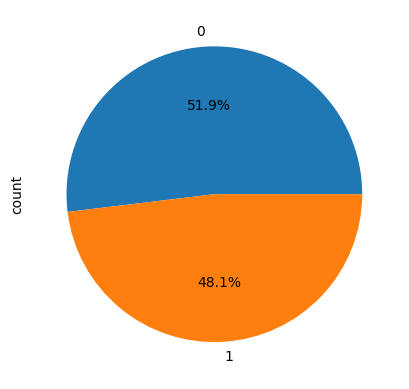

In [ ]:
import matplotlib as plt
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

In [ ]:
p.set_options(p.OPT.URL, p.OPT.EMOJI)

def preprocess(row):
    text = row['statement']
    # text = text.strip('\xa0')
    text = p.clean(text)
    tokenization = nltk.word_tokenize(text)
    return text

In [ ]:
df['statement'] = df['statement'].astype(str)
df['statement'] = df.apply(preprocess, axis=1)

In [ ]:
# Assuming your DataFrame is named df
df.to_csv('DATASET4.csv', index=False)

# cnn end to end embeddings

In [ ]:
texts = df['statement'].astype(str)
labels = df['label']


df.head()


,statement,label
0,Tanzanian club spokesman Haji S Manara was inf...,0
1,dr fauci sat microsoft board director,0
2,NEWS UK safe from coronavirus as Boris Johnson...,0
3,Does vaping reduce your chances of getting the...,0
4,WHO eu_echo Canada DFID_UK joined forces to su...,1


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Split the data into training (70%) and temporary (30%) sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, labels, test_size=0.3, random_state=0
)

# Further split the temporary set into validation (50% of 30%) and test (50% of 30%) sets
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=0
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_sequence_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Model definition
model = Sequential()
model.add(Embedding(10000, 128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(
    train_data, train_labels, epochs=5, batch_size=16, validation_data=(val_data, val_labels)
)

# Evaluate the model on the test data
_, accuracy = model.evaluate(test_data, test_labels)
print('Test Accuracy:', accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


524/524 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7986 - loss: 0.4706 - val_accuracy: 0.9025 - val_loss: 0.2409
Epoch 2/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9502 - loss: 0.1386 - val_accuracy: 0.9047 - val_loss: 0.2417
Epoch 3/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9891 - loss: 0.0446 - val_accuracy: 0.9069 - val_loss: 0.2875
Epoch 4/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9979 - loss: 0.0103 - val_accuracy: 0.9030 - val_loss: 0.3346
Epoch 5/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9995 - loss: 0.0036 - val_accuracy: 0.9041 - val_loss: 0.3795
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9088 - loss: 0.3375
Test Accuracy: 0.9074693322181702


In [ ]:
import pickle
from keras.models import model_from_json

# Save the entire model (architecture + weights + optimizer state)
model.save('cnn_model.h5')

# Save model architecture to JSON
model_json = model.to_json()
with open('cnn_model.json', 'w') as json_file:
    json_file.write(model_json)

# Save model weights with the correct filename extension
model.save_weights('cnn_model_weights.weights.h5')


# Save the tokenizer using pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

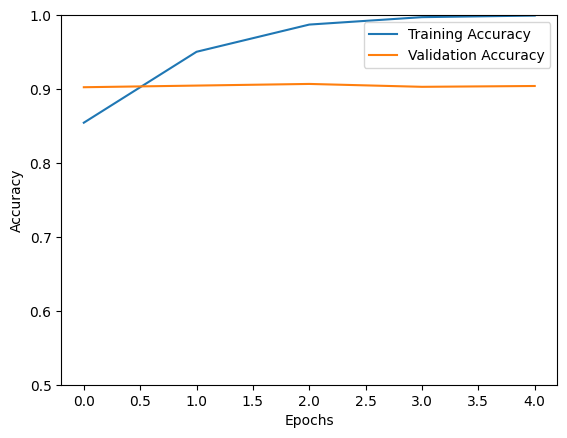

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


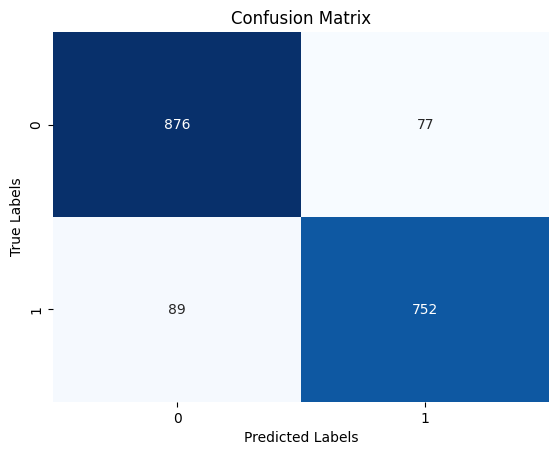

Classification Report:
              precision    recall  f1-score   support

        fake       0.91      0.92      0.91       953
        real       0.91      0.89      0.90       841

    accuracy                           0.91      1794
   macro avg       0.91      0.91      0.91      1794
weighted avg       0.91      0.91      0.91      1794

Accuracy: 90.75%
Precision (Fake): 90.78%
Precision (Real): 90.71%
Recall (Fake): 91.92%
Recall (Real): 89.42%
F1-Score (Fake): 91.35%
F1-Score (Real): 90.06%
Confusion Matrix:
[[876  77]
 [ 89 752]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support



# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend()
plt.show()

# Predict on test data
predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Create confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
report = classification_report(test_labels, predicted_labels, target_names=['fake', 'real'])
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Print precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# cnn word 2vec embedding

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader as api
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Load Word2Vec model
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
from keras.initializers import Constant
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

# Ensure all text data is treated as strings, including numbers
df['statement'] = df['statement'].astype(str)

# Extract texts and labels
texts = df['statement'].tolist()
labels = df['label'].tolist()

# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_sequence_length = max(len(seq) for seq in sequences)
X_data = pad_sequences(sequences, maxlen=max_sequence_length)

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = wv.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    if word in wv:
        embedding_matrix[index] = wv[word]

# Convert labels to NumPy arrays
labels = np.array(labels)

# Split data into training (70%), validation (15%), and test (15%) sets
X_temp, X_test, y_temp, y_test = train_test_split(X_data, labels, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=0) # 0.1765 * 0.85 ≈ 0.15

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_sequence_length,
                    trainable=False))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_val, y_val))
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


524/524 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8305 - loss: 0.3916 - val_accuracy: 0.8938 - val_loss: 0.2739
Epoch 2/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9454 - loss: 0.1680 - val_accuracy: 0.9055 - val_loss: 0.2720
Epoch 3/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9808 - loss: 0.0867 - val_accuracy: 0.8977 - val_loss: 0.2689
Epoch 4/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9962 - loss: 0.0323 - val_accuracy: 0.8932 - val_loss: 0.2827
Epoch 5/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9991 - loss: 0.0138 - val_accuracy: 0.9099 - val_loss: 0.3070
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9088 - loss: 0.2958
Test Accuracy: 0.907623827457428


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


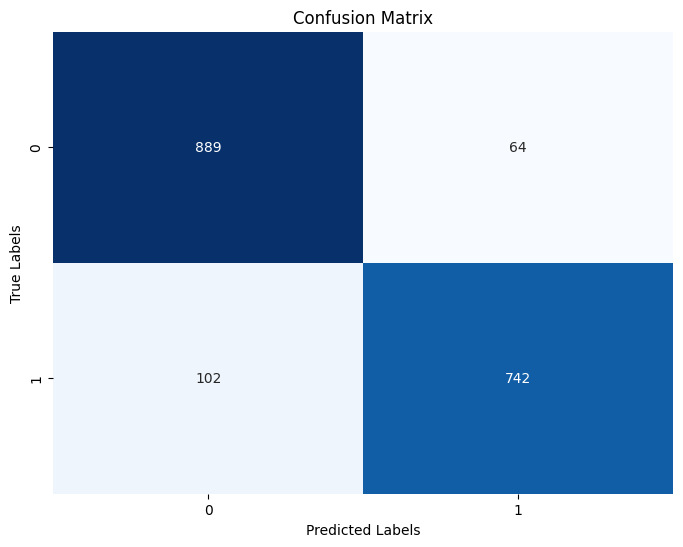

Classification Report:
              precision    recall  f1-score   support

        Fake       0.90      0.93      0.91       953
        Real       0.92      0.88      0.90       844

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797

Test Accuracy: 90.76%
Precision (Fake): 89.71%
Precision (Real): 92.06%
Recall (Fake): 93.28%
Recall (Real): 87.91%
F1-Score (Fake): 91.46%
F1-Score (Real): 89.94%


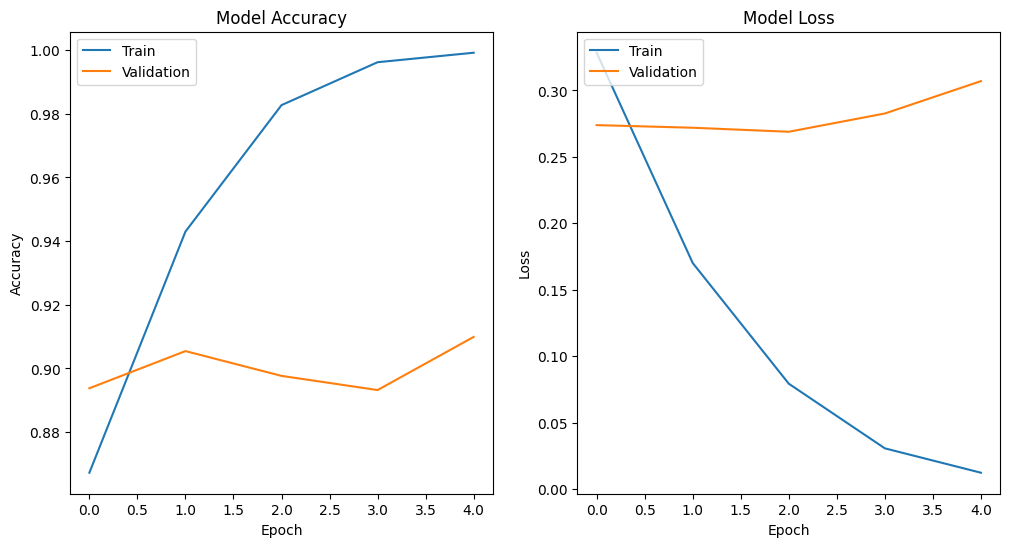

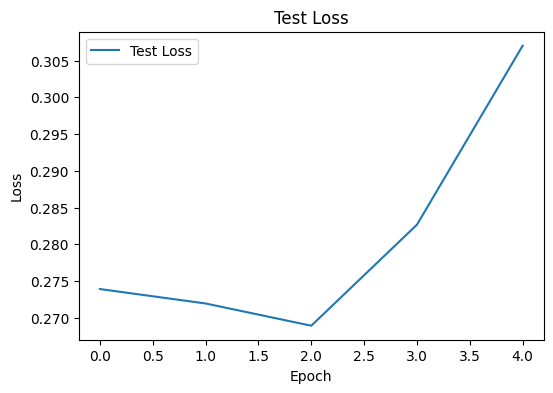

In [ ]:


# Predict on test data
predictions = model.predict(X_test)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
report = classification_report(y_test, predicted_labels, target_names=['Fake', 'Real'])
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predicted_labels, average=None)

# Print precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot test loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['val_loss'])
plt.title('Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test Loss'], loc='upper left')
plt.show()

In [ ]:
import pickle
from keras.models import model_from_json

# Save the entire model (architecture + weights + optimizer state)
model.save('cnn_model.h5')

# Save model architecture to JSON
model_json = model.to_json()
with open('cnn_model.json', 'w') as json_file:
    json_file.write(model_json)

# Save model weights with the correct filename extension
model.save_weights('cnn_model_weights.weights.h5')


# Save the tokenizer using pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [ ]:
from keras.initializers import Constant
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

# Ensure all text data is treated as strings, including numbers
df['statement'] = df['statement'].astype(str)

# Extract texts and labels
texts = df['statement'].tolist()
labels = df['label'].tolist()

# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_sequence_length = max(len(seq) for seq in sequences)
X_data = pad_sequences(sequences, maxlen=max_sequence_length)

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = wv.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    if word in wv:
        embedding_matrix[index] = wv[word]

# Convert labels to NumPy arrays
labels = np.array(labels)

# Split data into training (70%), validation (15%), and test (15%) sets
X_temp, X_test, y_temp, y_test = train_test_split(X_data, labels, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=0) # 0.1765 * 0.85 ≈ 0.15

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_sequence_length,
                    trainable=False))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.7))  # Adding Dropout layer here
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 337s 614ms/step - accuracy: 0.7496 - loss: 0.4937 - val_accuracy: 0.8804 - val_loss: 0.3012
Epoch 2/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 289s 552ms/step - accuracy: 0.8880 - loss: 0.2907 - val_accuracy: 0.8893 - val_loss: 0.2732
Epoch 3/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 277s 466ms/step - accuracy: 0.9164 - loss: 0.2334 - val_accuracy: 0.8843 - val_loss: 0.2692
Epoch 4/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 282s 504ms/step - accuracy: 0.9277 - loss: 0.2020 - val_accuracy: 0.8910 - val_loss: 0.2618
Epoch 5/5
524/524 ━━━━━━━━━━━━━━━━━━━━ 243s 464ms/step - accuracy: 0.9307 - loss: 0.1837 - val_accuracy: 0.8960 - val_loss: 0.2641
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 347ms/step - accuracy: 0.9075 - loss: 0.2534
Test Accuracy: 0.904841423034668


57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 526ms/step


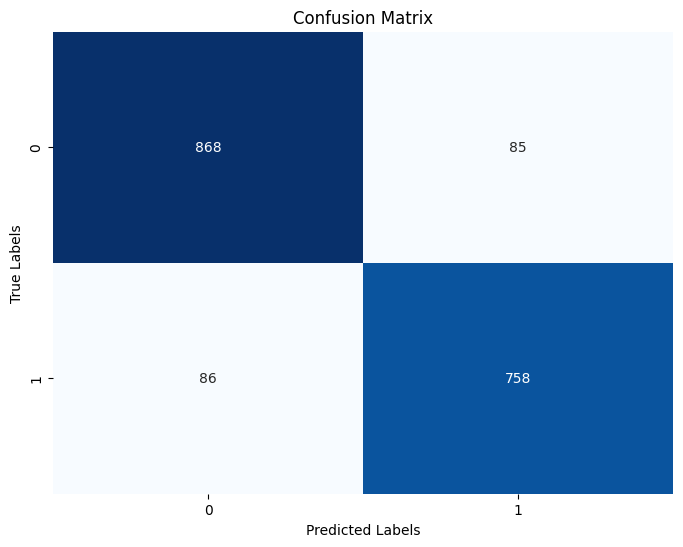

Classification Report:
              precision    recall  f1-score   support

        Fake       0.91      0.91      0.91       953
        Real       0.90      0.90      0.90       844

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797

Test Accuracy: 90.48%
Precision (Fake): 90.99%
Precision (Real): 89.92%
Recall (Fake): 91.08%
Recall (Real): 89.81%
F1-Score (Fake): 91.03%
F1-Score (Real): 89.86%


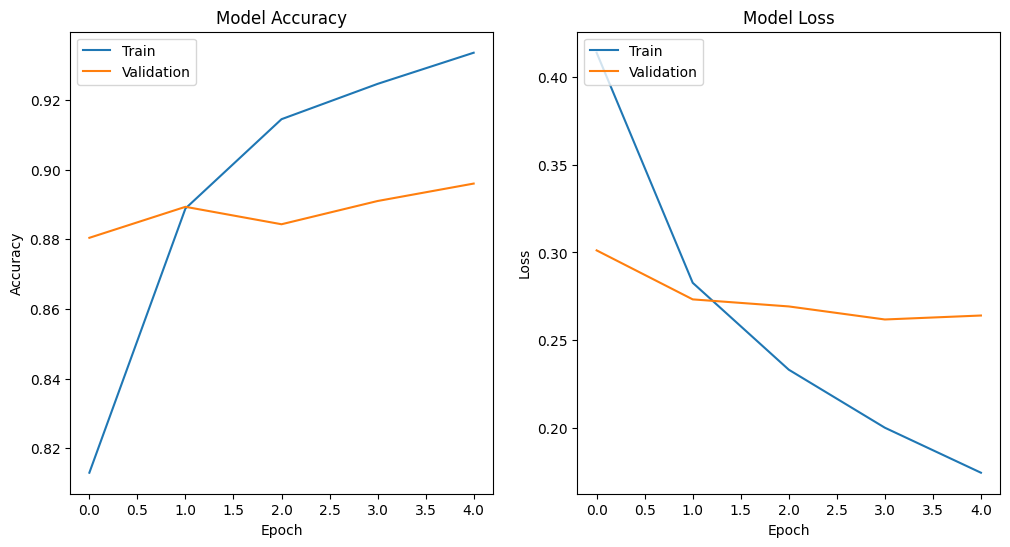

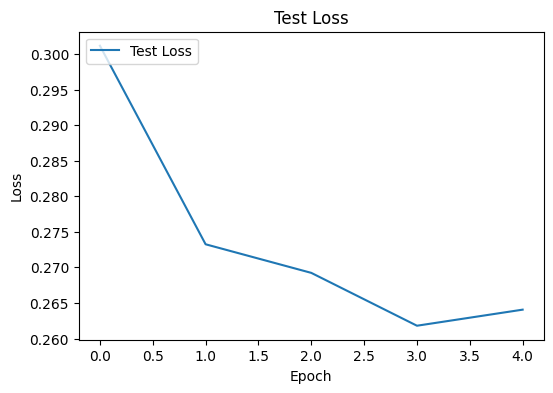

In [ ]:

# Predict on test data
predictions = model.predict(X_test)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
report = classification_report(y_test, predicted_labels, target_names=['Fake', 'Real'])
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predicted_labels, average=None)

# Print precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot test loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['val_loss'])
plt.title('Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test Loss'], loc='upper left')
plt.show()

# LSTM

In [ ]:
from keras.layers import LSTM, Dense
# Ensure all text data is treated as strings, including numbers
df['statement'] = df['statement'].astype(str)

# Extract texts and labels
texts = df['statement'].tolist()
labels = df['label'].tolist()

# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_sequence_length = max(len(seq) for seq in sequences)
X_data = pad_sequences(sequences, maxlen=max_sequence_length)

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = wv.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    if word in wv:
        embedding_matrix[index] = wv[word]

# Convert labels to NumPy arrays
labels = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.2, random_state=0)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_sequence_length,
                    trainable=False))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

Epoch 1/5
599/599 [==============================] - 62s 97ms/step - loss: 0.3471 - accuracy: 0.8599 - val_loss: 0.3290 - val_accuracy: 0.8673
Epoch 2/5
599/599 [==============================] - 56s 94ms/step - loss: 0.2686 - accuracy: 0.8949 - val_loss: 0.2785 - val_accuracy: 0.8911
Epoch 3/5
599/599 [==============================] - 63s 106ms/step - loss: 0.3428 - accuracy: 0.8508 - val_loss: 0.4821 - val_accuracy: 0.7959
Epoch 4/5
599/599 [==============================] - 55s 93ms/step - loss: 0.4077 - accuracy: 0.8130 - val_loss: 0.3186 - val_accuracy: 0.8756
Epoch 5/5
75/75 [==============================] - 3s 43ms/step - loss: 0.3075 - accuracy: 0.8844
Accuracy: 0.884390652179718


75/75 [==============================] - 3s 39ms/step - loss: 0.3075 - accuracy: 0.8844
Accuracy: 0.884390652179718
75/75 [==============================] - 3s 36ms/step


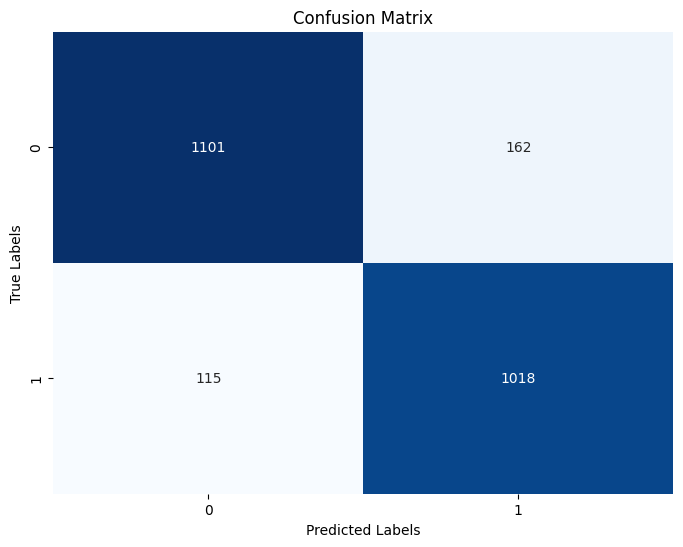

Classification Report:
              precision    recall  f1-score   support

        Fake       0.91      0.87      0.89      1263
        Real       0.86      0.90      0.88      1133

    accuracy                           0.88      2396
   macro avg       0.88      0.89      0.88      2396
weighted avg       0.89      0.88      0.88      2396

Accuracy: 88.44%
Precision (Fake): 90.54%
Precision (Real): 86.27%
Recall (Fake): 87.17%
Recall (Real): 89.85%
F1-Score (Fake): 88.83%
F1-Score (Real): 88.02%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

# Predict on test data
predictions = model.predict(X_test)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
report = classification_report(y_test, predicted_labels, target_names=['Fake', 'Real'])
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predicted_labels, average=None)

# Print precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))